**Ankush Singh**

**Solving the N-Queens Problem using hill climbing**

**Importing Libraries**

The below cell imports the necessary libraries for implementing and analyzing the Hill Climbing algorithm for solving the N-Queens problem. The libraries are below:

- `random` is used for generating initial configurations and implementing the Random Restarts.
- `time` is used to help measure the execution time of the algorithm for different board sizes (n=8, n=16, n=32).
-`numPy` provides efficient array manipulation, which is essential for board representation.
- `matplotlib`is used for visualizing the chessboard and establishing the bar graphs.
- `math` library assists in mathematical computations needed for heuristic evaluations and implementation in the cost function.


In [ ]:
#Importing necessary libraries
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import math

**Generating and Visualizing the Initial Board Configuration**

The code below introduces two main functionalities, The `gen_rand_config()` function creates an initial random arrangement of queens on the chessboard, where each queen is placed in a unique row for the given number of columns (N),
The `random.shuffle()` method randomizes the placement. The `visualize_board()` function provides a text-based representation of the chessboard.
Each row is constructed with a "Q" to indicate the queen's position and "." to represent empty spaces.

*Output (generating and visualizing the initial board config)*

- `Initial Configuration:` A randomly generated list where each index represents a column, and the value represents the row of the queen in that column.

- `Board Visualization:` Displays the chessboard with queens placed according to the initial configuration.Each row is constructed with a "Q" to indicate the queen's position and "." to represent empty spaces.

In [ ]:
def gen_rand_config(n):
    """
    Generating a random configuration for the N-Queens problem.
    Args:
    n (int): Size of the chessboard (N x N) and the number of queens.

    Returns:
    list: A list where each index represents a column and the value represents the row.
    """
    config = list(range(n))
    # Shuffle the list to randomize queen placements
    random.shuffle(config)
    return config

# Printing a text-based visualization of the N-Queens board.
def visualize_board(config):
    """
    Args:
    config (list): List of integers representing the queen's positions (column -> row).
    """
    n = len(config)
    for r in range(n):
# Creating a row with 'Q' for the queen and '.' for empty spaces
        row = " ".join("Q" if config[r] == c else "." for c in range(n))
        print(row)
    print()

# Example usage where we are defining the board size, generating the random confirguration.
# at the end showing the visual representation.
if __name__ == "__main__":
    n = 8
    initial_config = gen_rand_config(n)
    print("Initial Configuration:", initial_config)
    visualize_board(initial_config)


Initial Configuration: [6, 4, 2, 0, 1, 7, 3, 5]
. . . . . . Q .
. . . . Q . . .
. . Q . . . . .
Q . . . . . . .
. Q . . . . . .
. . . . . . . Q
. . . Q . . . .
. . . . . Q . .



**Cost Function**

The below code cell evaluates the "cost" of a given configuration of queens on the chessboard.
- `calculate_cost()` is a function where a list that shows how the queens are arranged, with each index being a column and the value being the queen's row position in that column. it's going iterate over every pair of queens. This function looks for conflicts and increases the cost for each one that is found.
- The cost of the initial configuration is computed using `calculate_cost(initial_config)`.

*Output (cost function)*
- Displays the cost of the initial configuration, which represents the number of conflicts in the current arrangement of queens and there are 5 conflicts where queens threaten each other diagonally.

In [ ]:
def calculate_cost(configuration):
    """
    Calculate the cost (number of conflicts) for the given configuration.
    Args:
    configuration (list): A list representing the configuration of the board.
                          Each index corresponds to a column, and the value which represents the row.

    Returns:
    int: Cost (number of conflicts) for the given configuration.
    """
    # Initializing  the cost (number of conflicts) to zero
    cost = 0
    N = len(configuration)
    # Comparing every pair of queens (i, j) to check for conflicts
    for i in range(N):
        for j in range(i + 1, N):
            if configuration[i] == configuration[j]:  # same column
                cost += 1
            elif abs(configuration[i] - configuration[j]) == abs(i - j):  # diagonal
                cost += 1
    return cost

# Example usage
# where it's calculating and printing the cost of the initial configuration
cost = calculate_cost(initial_config)
print("Cost of Initial Configuration:", cost)


Cost of Initial Configuration: 5


**Enhanced Hill Climbing Algorithm for the N-Queens Problem**

The Hill Climbing with Enhancements algorithm, defined in the below code cell, which improves the classic Hill Climbing algorithm for solving the N-Queens issue by adding Random Restarts and Sideways Moves.

*Function Overview*
- `hill-climbing_with_enhancements` takes as inputs the `n` chessboard size (N x N) and queen count, `max_sideways_moves` is the maximum number of sideways moves authorized when trapped in an incline (by default, 100), and `max_restarts` is the maximum number of random restarts granted to prevent local optima (by default, 10).
- The randomness in generating initial configurations `(gen_rand_config)` and selecting moves introduces variability in the results

*Algorithm Execution*
- The initialization process begins with an empty "best solution." Set all performance measures to zero, including `total_sideways_moves`, `total_iterations`, and `total_restarts`.
- Generate a new random initial configuration when the current attempt fails to improve further and Restart until `max_restarts` is reached.
- Move each queen to a different row in its column to create each possible neighbor and Evaluates the each neighbor's cost.
- Sort neighbors based on cost and choose the best one and If there is no possible improvement the algorithm is going to perform a sideways move (if cost remains the same) until the limit is reached.
- The algorithm stops when a solution is identified and the cost reaches 0.




In [ ]:
def hill_climbing_with_enhancements(n, max_restarts=10, max_sideways_moves=100):
    """
    Hill Climbing with Random Restarts and Sideways Moves for the N-Queens problem.
    Args:
        n (int): The size of the chessboard (N x N) and the number of queens.
        max_restarts (int): The maximum number of random restarts allowed.
        max_sideways_moves (int): The maximum number of sideways moves allowed during each attempt.

    Return:
        dict: A dictionary containing the results of the hill climbing algorithm such as:
        "success" (bool): True if a solution is found, False otherwise.
        "iterations" (int): The total number of iterations performed.
        "restarts" (int): The total number of random restarts performed.
        "sideways_moves" (int): The total number of sideways moves performed.

    The algorithm terminates when a solution with zero conflicts (cost = 0) is found.
    If the algorithm gets stuck in a local minimum, it restarts with a new random configuration.
    """

    # Initializing the  variables for tracking the config and metrics.
    best_config = None
    best_cost = float('inf')
    total_iterations = 0
    total_restarts = 0
    total_sideways_moves = 0
    start_time = time.time()

    # performing the algorithm with up to max_restarts
    for restart in range(max_restarts):
        total_restarts += 1
        # Generating  a random initial configuration
        current_config = gen_rand_config(n)
        current_cost = calculate_cost(current_config)
        sideways_moves = 0

        # Perforing hill climbing until the solution is found
        while current_cost > 0:
            total_iterations += 1
            neighbors = []

            # Generate neighbors
            for row in range(n):
                for col in range(n):
                    if col != current_config[row]:
                      # Creating a copy of the current configuration
                        new_config = current_config[:]
                        new_config[row] = col
                        neighbors.append((new_config, calculate_cost(new_config)))

            # Sorting the neighbors by their cost in the ascending order.
            neighbors.sort(key=lambda x: x[1])
            best_neighbor, best_cost = neighbors[0]

            # No improvement case (if there is no improvement, the loop will break)
            if best_cost > current_cost:
                break
            elif best_cost == current_cost:  # Sideways move
                sideways_moves += 1
                if sideways_moves > max_sideways_moves:
                    break

            # Updating the current configuration and cost
            current_config, current_cost = best_neighbor, best_cost

        total_sideways_moves += sideways_moves

        # Checking if a solution is found (cost = 0)
        if current_cost == 0:
            best_config = current_config
            best_cost = current_cost
            break

    end_time = time.time()
    time_taken = end_time - start_time

    # Return the results as a dictionary
    return {
        "success": best_cost == 0,
        "iterations": total_iterations,
        "restarts": total_restarts,
        "sideways_moves": total_sideways_moves,
        "time_taken": time_taken,
        "cost": best_cost,
        "final_config": best_config,
    }

**Running Hill Climbing with Visualization**

The code cell below runs the improved Hill Climbing algorithm several times (for n=8) and displays the outcomes to give a better understanding of how well the method works.

*Execution of Algorithm*

- The function `run_hill_climbing_with_visualization()` runs the Hill Climbing algorithm for a given number of runs (3 times for n=8). The success status, total number of iterations, sideways moves, restarts, execution time, and final configuration cost are among the comprehensive metrics that are printed for every run.
- `result` calculates averages for iterations, execution time, and overall success rate across the runs and collects the data from each run.

*Visualization*

- Uses Matplotlib to create two bar charts where we have `Iterations per Run` which Shows the number of iterations and `Execution Time per Run` is displaying the time taken to complete each run

*Output running hill climbing with visualization*

- A 100% success rate means that, given the current setup, the algorithm regularly discovers a solution for n=8.
- Due to the random nature of initial configurations and sideways movements, the algorithm will provide different results each time it runs.





--- Running Hill Climbing for N = 8 (3 runs) ---

--- Run 1 ---
Success: True
Iterations: 108
Restarts: 2
Sideways Moves: 103
Execution Time: 0.0556 seconds
Cost (Conflicts): 0
Final Board Configuration: [3, 6, 2, 7, 1, 4, 0, 5]
. . . Q . . . .
. . . . . . Q .
. . Q . . . . .
. . . . . . . Q
. Q . . . . . .
. . . . Q . . .
Q . . . . . . .
. . . . . Q . .

--- Run 2 ---
Success: True
Iterations: 5
Restarts: 1
Sideways Moves: 2
Execution Time: 0.0025 seconds
Cost (Conflicts): 0
Final Board Configuration: [3, 6, 4, 2, 0, 5, 7, 1]
. . . Q . . . .
. . . . . . Q .
. . . . Q . . .
. . Q . . . . .
Q . . . . . . .
. . . . . Q . .
. . . . . . . Q
. Q . . . . . .

--- Run 3 ---
Success: True
Iterations: 211
Restarts: 3
Sideways Moves: 203
Execution Time: 0.1223 seconds
Cost (Conflicts): 0
Final Board Configuration: [5, 2, 6, 1, 3, 7, 0, 4]
. . . . . Q . .
. . Q . . . . .
. . . . . . Q .
. Q . . . . . .
. . . Q . . . .
. . . . . . . Q
Q . . . . . . .
. . . . Q . . .


--- Summary ---
Average Iter

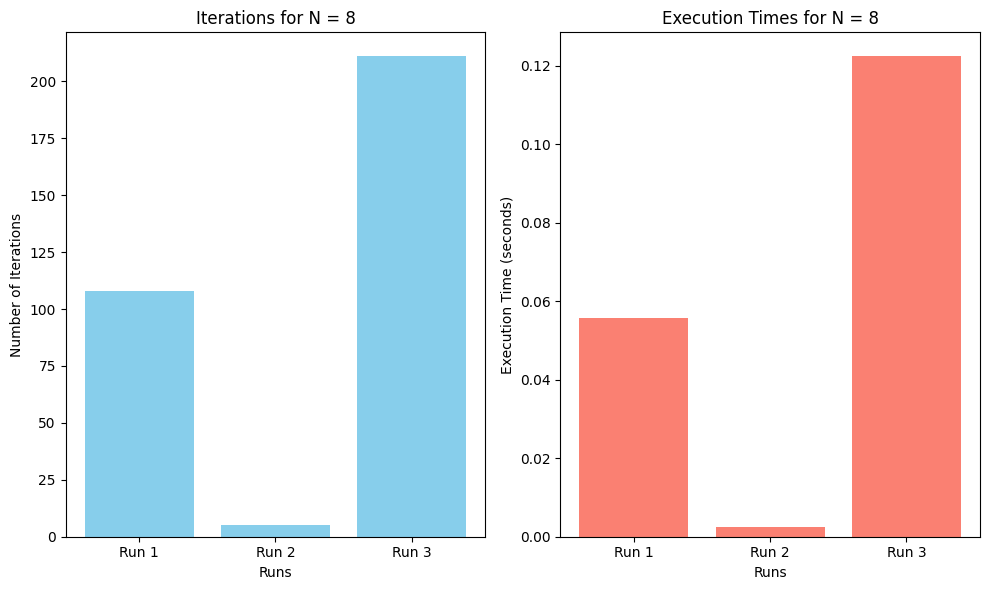

(108.0, 0.060137033462524414, 100.0)

In [ ]:
def run_hill_climbing_with_visualization(n, runs=3, max_restarts=10, max_sideways_moves=100):
    """
    Running  the hill climbing function multiple times, printing results, and
    computing averages with visualization in bar graphs.
    Args:
        n (int): The size of the chessboard (N x N) and the number of queens.
        runs (int): The number of times the hill climbing algorithm should be run.
        max_restarts (int): The maximum number of random restarts allowed.
        max_sideways_moves (int): The maximum number of sideways moves allowed during each attempt.

    Returns:
    avg_iterations (float): Average number of iterations across all runs.
    avg_execution_time (float): Average execution time across all runs.
    success_rate (float): Percentage of runs that resulted in success.

    Visualization:
        - Iterations per run (bar chart).
        - Execution time per run (bar chart).
    """
    total_iterations = 0
    total_execution_time = 0
    success_count = 0

    # Data for visualization
    run_labels = []
    iteration_counts = []
    execution_times = []

    print(f"\n--- Running Hill Climbing for N = {n} ({runs} runs) ---\n")
    for run in range(runs):
      # Executing  the algorithm for the specified number of runs
        print(f"--- Run {run + 1} ---")

        # Displaying the results for this run
        result = hill_climbing_with_enhancements(n, max_restarts, max_sideways_moves)
        print(f"Success: {result['success']}")
        print(f"Iterations: {result['iterations']}")
        print(f"Restarts: {result['restarts']}")
        print(f"Sideways Moves: {result['sideways_moves']}")
        print(f"Execution Time: {result['time_taken']:.4f} seconds")
        print(f"Cost (Conflicts): {result['cost']}")

        # If a solution is found, the board configuration will be visualized
        if result['success']:
            success_count += 1
            print(f"Final Board Configuration: {result['final_config']}")
            visualize_board(result['final_config'])
        else:
            print("No valid solution found.")

        # updating the metrics (time and iterations)
        total_iterations += result['iterations']
        total_execution_time += result['time_taken']

        # data for visualization is getting store
        run_labels.append(f"Run {run + 1}")
        iteration_counts.append(result['iterations'])
        execution_times.append(result['time_taken'])

    # computing averages and sucess rate
    avg_iterations = total_iterations / runs
    avg_execution_time = total_execution_time / runs
    success_rate = (success_count / runs) * 100

    # printing the summary of the runs
    print("\n--- Summary ---")
    print(f"Average Iterations: {avg_iterations:.2f}")
    print(f"Average Execution Time: {avg_execution_time:.4f} seconds")
    print(f"Success Rate: {success_rate:.2f}%")

    # Visualization
    plt.figure(figsize=(10, 6))

    # Bar graph for iterations
    plt.subplot(1, 2, 1)
    plt.bar(run_labels, iteration_counts, color='skyblue')
    plt.title(f"Iterations for N = {n}")
    plt.xlabel("Runs")
    plt.ylabel("Number of Iterations")

    # Bar graph for execution times
    plt.subplot(1, 2, 2)
    plt.bar(run_labels, execution_times, color='salmon')
    plt.title(f"Execution Times for N = {n}")
    plt.xlabel("Runs")
    plt.ylabel("Execution Time (seconds)")

    plt.tight_layout()
    plt.show()

    return avg_iterations, avg_execution_time, success_rate


# usage to run the algorithm and visualize results for n=8
# to experience more about results we can change runs to 4,5 etc.
run_hill_climbing_with_visualization(n=8, runs=3)


**Hill Climbing with Enhancements for N = 16**

The cell below is focusing on doing 3 iterations of the improved Hill Climbing method for the N-Queens problem with N=16. Performance indicators are analyzed, successful and unsuccessful runs are highlighted, and the outcomes are shown in the output.

- Executes the `hill_climbing_with_enhancements` function for `N=16` over `3` runs to capture the variability in performance.
- For each run, metrics such as success status, total iterations, number of restarts, sideways moves, execution time, and conflicts are recorded.

*Visualization*

- Uses Matplotlib to create two bar charts where we have `Iterations per Run` which highlights the variability in the number of iterations required to find a solution. `Execution Time per Run` is displaying the time taken for each run.

*Output (Hill Climbing with Enhancements for N = 16)*

- The program will provide different outcomes each time it runs since beginning configurations and sideways motions are random.
- Shows that Run 3 required significantly more iterations, highlighting a failed case with high computational cost. Run 3 failed. Because the search space became more difficult for bigger board sizes like N=16, it was unable to overcome these restrictions even after several restarts and more than 1,000 sideways moves



Summary for 3 Runs with N = 16 (Hill Climbing with Enhancements):
Successful Runs: 2
Failed Runs: 1
Success Rate: 66.67%
Average Iterations: 754.33
Average Execution Time: 7.0260 seconds

Run 1:
  Success: True
  Iterations: 763
  Restarts: 8
  Sideways Moves: 710
  Execution Time: 7.5483 seconds
  Cost (Conflicts): 0
  Final Board Configuration: [9, 4, 13, 3, 12, 2, 7, 14, 6, 11, 1, 15, 0, 5, 10, 8]
. . . . . . . . . Q . . . . . .
. . . . Q . . . . . . . . . . .
. . . . . . . . . . . . . Q . .
. . . Q . . . . . . . . . . . .
. . . . . . . . . . . . Q . . .
. . Q . . . . . . . . . . . . .
. . . . . . . Q . . . . . . . .
. . . . . . . . . . . . . . Q .
. . . . . . Q . . . . . . . . .
. . . . . . . . . . . Q . . . .
. Q . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . Q
Q . . . . . . . . . . . . . . .
. . . . . Q . . . . . . . . . .
. . . . . . . . . . Q . . . . .
. . . . . . . . Q . . . . . . .

Run 2:
  Success: True
  Iterations: 437
  Restarts: 5
  Sideways Moves: 405
  Exe

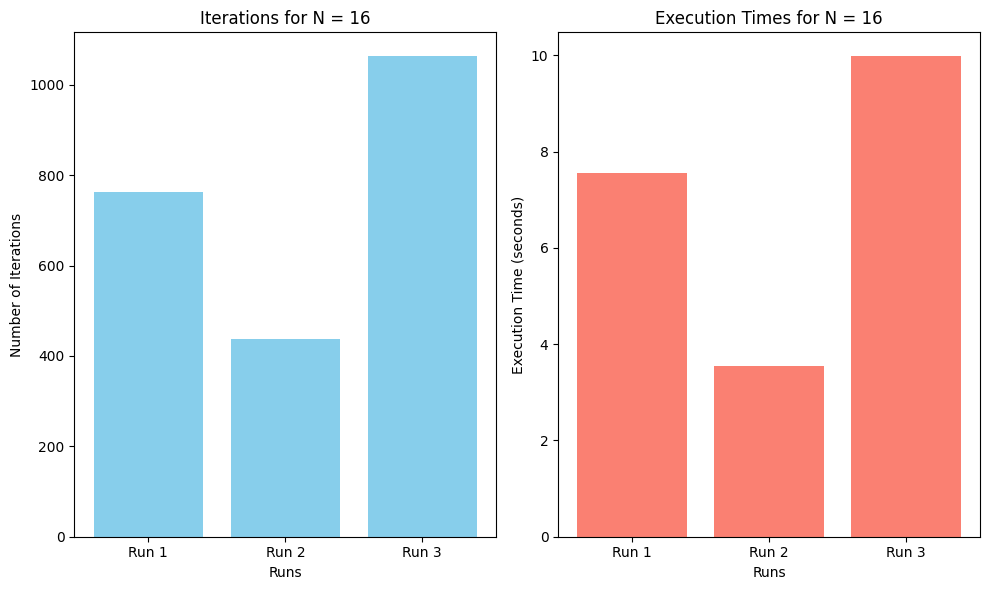

In [ ]:
# Collecting multiple results for N = 16
n = 16

# Number of runs to capture variability
runs = 3
results_summary = []

# Initializing the metrics for analysis
total_iterations = 0
total_execution_time = 0
success_count = 0

# Storing the data for visualization
run_labels = []
iteration_counts = []
execution_times = []

# Running the Hill Climbing algorithm with enhancements multiple times
for i in range(runs):
    result = hill_climbing_with_enhancements(n)
    results_summary.append(result)

    # Updating the increasing metrics
    total_iterations += result['iterations']
    total_execution_time += result['time_taken']
    if result['success']:
        success_count += 1
    run_labels.append(f"Run {i + 1}")
    iteration_counts.append(result['iterations'])
    execution_times.append(result['time_taken'])

# Computing the average and success rate for n=16 like
success_rate = (success_count / runs) * 100
avg_iterations = total_iterations / runs
avg_execution_time = total_execution_time / runs

# Display summary of results
print(f"\nSummary for {runs} Runs with N = {n} (Hill Climbing with Enhancements):")
print(f"Successful Runs: {success_count}")
print(f"Failed Runs: {runs - success_count}")
print(f"Success Rate: {success_rate:.2f}%")
print(f"Average Iterations: {avg_iterations:.2f}")
print(f"Average Execution Time: {avg_execution_time:.4f} seconds\n")

# Displaing the results for each run
for i, res in enumerate(results_summary):
    print(f"Run {i + 1}:")
    print(f"  Success: {res['success']}")
    print(f"  Iterations: {res['iterations']}")
    print(f"  Restarts: {res['restarts']}")
    print(f"  Sideways Moves: {res['sideways_moves']}")
    print(f"  Execution Time: {res['time_taken']:.4f} seconds")
    print(f"  Cost (Conflicts): {res['cost']}")
    if res["final_config"]:
        print(f"  Final Board Configuration: {res['final_config']}")
        visualize_board(res['final_config'])
    else:
        print(f"  No valid solution found for Run {i + 1}\n")

# Visualization for Iterations and Execution Times
plt.figure(figsize=(10, 6))

# Bar graph for iterations
plt.subplot(1, 2, 1)
plt.bar(run_labels, iteration_counts, color='skyblue')
plt.title(f"Iterations for N = {n}")
plt.xlabel("Runs")
plt.ylabel("Number of Iterations")

# Bar graph for execution times
plt.subplot(1, 2, 2)
plt.bar(run_labels, execution_times, color='salmon')
plt.title(f"Execution Times for N = {n}")
plt.xlabel("Runs")
plt.ylabel("Execution Time (seconds)")
plt.tight_layout()
plt.show()

**Hill Climbing with Enhancements for N = 32**

The below code cell does 3 iterations of the improved Hill Climbing method for the N-Queens issue with `N=32` and evaluates the outcomes.

*Visualization*

- `Iterations per Run` shows that Runs 2 and 3 required significantly more iterations compared to Run 1, highlighting failures in the last two runs and `Execution Times per Run` reflects high execution times for Runs 2 and 3, corresponding to their inability to find a solution.

*Reasons for Failures*
- With `N=32`, the search space is significantly larger, increasing the chances of getting stuck in local optima where no moves reduce the cost.
- Runs 2 and 3 performed similar sideways moves each, suggesting the algorithm was stuck in levels for a significant portion of the search and It was unable to get out of these areas even with sideways movements.
- Larger board sizes result in higher computation costs per iteration.
- The challeng of solving the N-Queens problem grow exponentially with larger board sizes like N=32.


Run 1:
  Success: True
  Iterations: 919
  Restarts: 9
  Sideways Moves: 810
  Time Taken: 133.6249 seconds
  Cost (Conflicts): 0
  Final Board Configuration: [26, 5, 9, 18, 15, 28, 31, 6, 27, 19, 0, 7, 10, 25, 30, 16, 1, 3, 12, 24, 29, 4, 17, 23, 21, 2, 14, 20, 8, 13, 11, 22]
. . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . .
. . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . .
. . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q
. . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . .
. . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . .
Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . Q .

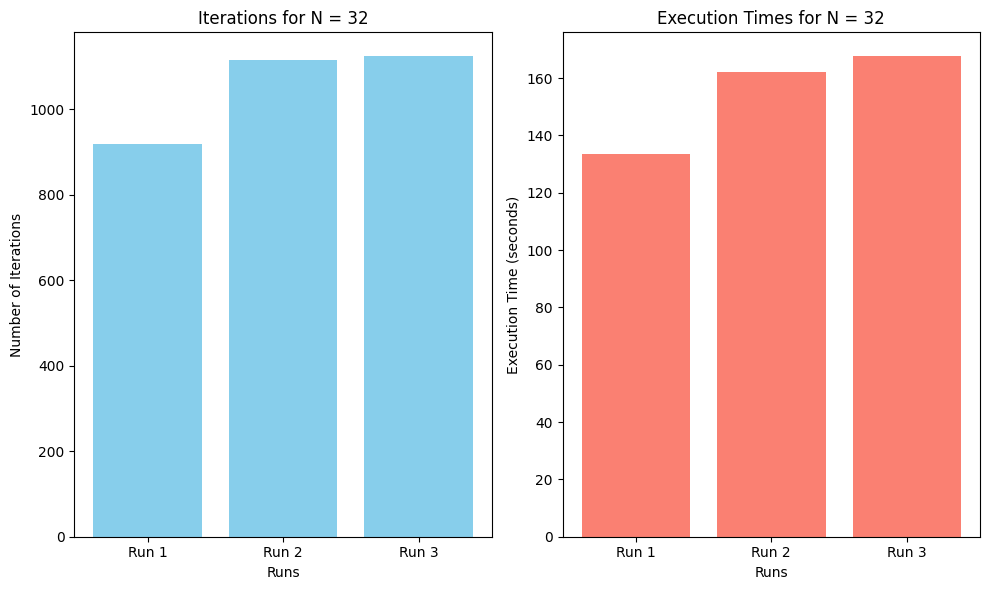

In [ ]:
def collect_results_with_visualization(hill_climbing_function, n, runs):
    """
    Perform multiple runs of the hill climbing algorithm for a board size of n=32
    and collect the results.
    Args:
        hill_climbing_function (function): The hill climbing algorithm function.
        n (int): The size of the chessboard (N x N) and the number of queens.
        runs (int): The number of times the hill climbing algorithm should be run.

    Returns:
        list: A list of dictionaries containing the results of each run.
        Each dictionary has the following keys such as:
        - "success" (bool): True if a solution is found, False otherwise.
        - "iterations" (int): The total number of iterations performed.
        - "restarts" (int): The total number of random restarts performed.
        - "sideways_moves" (int): The total number of sideways moves performed.


    """
    results = []
    total_iterations = 0
    total_execution_time = 0
    success_count = 0

    # data for the visualization
    run_labels = []
    iteration_counts = []
    execution_times = []

    # Running the hill climbing algorithm multiple times
    for i in range(runs):
        result = hill_climbing_function(n)

        # Stores the result for this run
        results.append(result)
        total_iterations += result['iterations']
        total_execution_time += result['time_taken']
        if result['success']:
            success_count += 1

        # Printing the individual run details
        print(f"\nRun {i + 1}:")
        print(f"  Success: {result['success']}")
        print(f"  Iterations: {result['iterations']}")
        print(f"  Restarts: {result['restarts']}")
        print(f"  Sideways Moves: {result['sideways_moves']}")
        print(f"  Time Taken: {result['time_taken']:.4f} seconds")
        print(f"  Cost (Conflicts): {result['cost']}")
        if result["success"]:
            print(f"  Final Board Configuration: {result['final_config']}")
            visualize_board(result["final_config"])
        else:
            print("  No valid solution found.")

        # Store data for visualization
        run_labels.append(f"Run {i + 1}")
        iteration_counts.append(result['iterations'])
        execution_times.append(result['time_taken'])

    # Compute the success rate and average of execution and iterations
    success_rate = (success_count / runs) * 100
    avg_iterations = total_iterations / runs
    avg_execution_time = total_execution_time / runs

    # Printing the summary
    print(f"\nSummary for {runs} Runs with N = {n} (Hill Climbing with Enhancements):")
    print(f"Successful Runs: {success_count}")
    print(f"Failed Runs: {runs - success_count}")
    print(f"Success Rate: {success_rate:.2f}%")
    print(f"Average Iterations: {avg_iterations:.2f}")
    print(f"Average Execution Time: {avg_execution_time:.4f} seconds\n")

    # Visualization
    plt.figure(figsize=(10, 6))

    # Bar graph for iterations
    plt.subplot(1, 2, 1)
    plt.bar(run_labels, iteration_counts, color='skyblue')
    plt.title(f"Iterations for N = {n}")
    plt.xlabel("Runs")
    plt.ylabel("Number of Iterations")

    # Bar graph for execution times
    plt.subplot(1, 2, 2)
    plt.bar(run_labels, execution_times, color='salmon')
    plt.title(f"Execution Times for N = {n}")
    plt.xlabel("Runs")
    plt.ylabel("Execution Time (seconds)")

    plt.tight_layout()
    plt.show()

    return results


# Example usage for N = 32
n = 32

# number of run is 3 and if user want to experiment with 4,5 etc. can implement
# more int value of run
runs = 3
results_32 = collect_results_with_visualization(hill_climbing_with_enhancements, n, runs)


**Comparison of Hill Climbing for Multiple Board Sizes**

Using the Pandas library, the below code cell combines the data into a structured table and analyzes the Hill Climbing with Enhancements algorithm's performance across various board sizes (N = 8, 16, 32) which we can see in the output.

*Overview for Functionality*

- `pandas`library is used for organizing and displaying the results in a tabular format to analyze different board sizes we have such as n=8, n=16 and n=32.
- The `collect_results_for_comparison()` function runs the Hill Climbing algorithm multiple times `(runs=3)` for each specified board size `(n_values=[8, 16, 32])`.
- `Data Aggregation`For each board size, the function calculates the Average Iterations where we can see the total steps required on average. The Average execution Time (s) where time taken to find a solution or fail, averaged over all runs and success Rate (%) is the percentage of successful runs out of the total.
- Detailed metrics are collected for each run, including iterations, execution time, restarts, sideways moves, and success/failure.


*Output Overview*

- Results are stored in a Pandas DataFrame and printed as a comparison table.
- The algorithm's randomness (e.g., in generating initial configurations and handling sideways moves) leads to variability in outcomes for each run.
- Some runs succeed quickly, while others may fail or take significantly longer, depending on the initial configuration and search path.
- For the smaller board `N=8`, the success rate is (100%) due to a smaller search space and easier optimization.
- For the medium size board `N=16`, the success rate is moderate (66.67%) as the algorithm occasionally gets stuck in local optima.
- For the larger size board `N=32`, the success rate is less (33.33%) due to the significantly larger search space and failures are more common as the algorithm struggles with local optima

In [ ]:
import pandas as pd

def collect_results_for_comparison(hill_climbing_function, n_values, runs=3):
    """
    Perform multiple runs of the hill climbing algorithm for d board sizes and collect results to compare.
    Args:
        hill_climbing_function (function): The hill climbing algorithm function.
        n_values (list): A list of board sizes (N) to run the algorithm for.
        runs (int): The number of times the hill climbing algorithm should be run.
        Returns:
        pd.DataFrame: A DataFrame containing the comparison results.
        Each row represents a different board size, and columns include:

    """
    # List to store aggregated results for each board size
    comparison_data = []

    for n in n_values:
        print(f"\nRunning Hill Climbing for N = {n}")

        # Initializing metrics for the board size
        total_iterations = 0
        total_execution_time = 0
        success_count = 0

        # Performing multiple runs for the board size
        for i in range(runs):
            result = hill_climbing_function(n)
            total_iterations += result['iterations']
            total_execution_time += result['time_taken']
            if result['success']:
                success_count += 1

            # Print individual run details
            print(f"\nRun {i + 1}:")
            print(f"  Success: {result['success']}")
            print(f"  Iterations: {result['iterations']}")
            print(f"  Restarts: {result['restarts']}")
            print(f"  Sideways Moves: {result['sideways_moves']}")
            print(f"  Execution Time: {result['time_taken']:.4f} seconds")
            print(f"  Cost (Conflicts): {result['cost']}")
            if result["success"]:
                print(f"  Final Board Configuration: {result['final_config']}")
            else:
                print("  No valid solution found.")

        # Compute aggregated metrics such as average and success rate
        avg_iterations = total_iterations / runs
        avg_execution_time = total_execution_time / runs
        success_rate = (success_count / runs) * 100

        # Storing the aggregated results
        comparison_data.append({
            'Board Size (N)': n,
            'Average Iterations': avg_iterations,
            'Average Execution Time (s)': avg_execution_time,
            'Success Rate (%)': success_rate
        })
    # Converting the results to a pandas DataFrame
    return pd.DataFrame(comparison_data)


# List of board sizes to compare and making it run for 3 times.
n_values = [8, 16, 32]
runs = 3

# Collecting the comparison data
comparison_table = collect_results_for_comparison(hill_climbing_with_enhancements, n_values, runs)

# Displaying the comparison table for n values (8,16,32)
print("\n--- Comparison Table ---\n")
print(comparison_table.to_string(index=False))



Running Hill Climbing for N = 8

Run 1:
  Success: True
  Iterations: 7
  Restarts: 2
  Sideways Moves: 0
  Execution Time: 0.0070 seconds
  Cost (Conflicts): 0
  Final Board Configuration: [6, 2, 7, 1, 4, 0, 5, 3]

Run 2:
  Success: True
  Iterations: 417
  Restarts: 5
  Sideways Moves: 405
  Execution Time: 0.2208 seconds
  Cost (Conflicts): 0
  Final Board Configuration: [1, 4, 6, 3, 0, 7, 5, 2]

Run 3:
  Success: True
  Iterations: 107
  Restarts: 2
  Sideways Moves: 102
  Execution Time: 0.0649 seconds
  Cost (Conflicts): 0
  Final Board Configuration: [5, 2, 6, 1, 3, 7, 0, 4]

Running Hill Climbing for N = 16

Run 1:
  Success: True
  Iterations: 225
  Restarts: 3
  Sideways Moves: 204
  Execution Time: 2.6934 seconds
  Cost (Conflicts): 0
  Final Board Configuration: [7, 15, 3, 9, 2, 13, 8, 4, 0, 14, 5, 11, 1, 12, 10, 6]

Run 2:
  Success: False
  Iterations: 1062
  Restarts: 10
  Sideways Moves: 1010
  Execution Time: 9.3089 seconds
  Cost (Conflicts): 1
  No valid solution fo

**README: Solving the N-Queens Problem Using Hill Climbing**

The objective of this project is to solve the known N-Queens Problem, which involves placing N queens on a N x N chessboard so that no two queens pose a danger to one another, using Hill Climbing with Enhancements. The project includes elements such as:

- `Restarting at random:` To get out of local optima.
- `Sideways Moves:` To deal with search space levels.
- `Performance Visualization:` Includes metrics and charts for different board sizes.

*Setup Instructions*
1. Clone or download the repository files.
2. Install Python 3.7+.
3. Install the required libraries: `matplotlib`, `pandas`
4. Run the Jupyter Notebook(.ipynb) in an environment like Google Colab or Visual Studio Code.

*How to Run*

1. Solve for a specific board Size: Use the `hill_climbing_with_enhancements` algorithm.
2. Multiple runs for a single board size: `results = collect_results_with_visualization(hill_climbing_with_enhancements, n=16, runs=3)`
3. Compare performances for different board sizes: Use `collect_results_for_comparison` function fo better understanding of three different board sizes.

Each run starts with a random initial configuration, resulting in variability in outcomes.

*Results Summary*

- Smaller boards (N=8): Achieve a 100% success rate with minimal computation.
- Medium boards (N=16): Show the moderate success rates (66.67%), with some failures due to local optima.
- Larger boards (N=32): Success rate drops to 33.33% as the search space complexity increases.


*Limitations*
- The algorithm can get stuck in local optima, leading to failures.
- Performance degrades significantly with larger board sizes (N > 32) due to exponential search space growth.

*Future Ideas*

- We can introduce simmulated healing which introduce uphill moves to escape local optima.
- We can also introduce genetic Algorithms which can help in leverage population-based search.